# Lorenz System Lyapunov Exponents as $\rho$ changes (paper version)

$$
\begin{split}
\dot{x} &= \sigma(y-x)\\
\dot{y} &= x(\rho-z)-y\\
\dot{z} &= xy - \beta z
\end{split}
$$

## $\sigma = 10, \beta = \frac{8}{3}$

## (true system)

In [1]:
#https://github.com/PerezHz/TaylorIntegration.jl/blob/main/examples/Lorenz-Lyapunov-spectrum.ipynb
#https://scicomp.stackexchange.com/questions/36013/numerical-computation-of-lyapunov-exponent
#https://stackoverflow.com/questions/60338471/lyapunov-spectrum-for-known-odes-python-3

# Import libraries
import math     as math
import numpy    as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [2]:
#######################################################################
# L I S T   O F   R H O   V A L U E S
#######################################################################
rho_list  = np.arange(166, 167.01, .01)
rho_list  = np.round(rho_list,2)

rho_list  = np.sort(rho_list)

len_rho_list = len(rho_list)

print(len_rho_list)

101


In [3]:
for s in range(len_rho_list):
    print(rho_list[s])

166.0
166.01
166.02
166.03
166.04
166.05
166.06
166.07
166.08
166.09
166.1
166.11
166.12
166.13
166.14
166.15
166.16
166.17
166.18
166.19
166.2
166.21
166.22
166.23
166.24
166.25
166.26
166.27
166.28
166.29
166.3
166.31
166.32
166.33
166.34
166.35
166.36
166.37
166.38
166.39
166.4
166.41
166.42
166.43
166.44
166.45
166.46
166.47
166.48
166.49
166.5
166.51
166.52
166.53
166.54
166.55
166.56
166.57
166.58
166.59
166.6
166.61
166.62
166.63
166.64
166.65
166.66
166.67
166.68
166.69
166.7
166.71
166.72
166.73
166.74
166.75
166.76
166.77
166.78
166.79
166.8
166.81
166.82
166.83
166.84
166.85
166.86
166.87
166.88
166.89
166.9
166.91
166.92
166.93
166.94
166.95
166.96
166.97
166.98
166.99
167.0


In [4]:
# to compute elapsed time
start_time = time.time()

#ODE system
def func(t, v, sigma, r, b):
    x, y, z = v #unpack the variables
    return [ sigma * (y - x), r * x - y - x * z, x * y - b * z ]

#Jacobian matrix
def JM(v, sigma, r, b):
    x, y, z = [k for k in v]
    return np.array([[-sigma, sigma, 0], [r - z, -1, -x], [y, x, -b]])

D = 3
True_LE   = np.zeros((len_rho_list, D))

for s in range(len_rho_list):
    #initial parameters
    sigma = 10
    r = rho_list[s]
    b = 8/3

    U = np.eye(3) #unit blob
    v0 = np.array([0., 1.,0.]) #np.ones(3) #initial condition
    lyap = [] #empty list to store the lengths of the orthogonal axes

    iters=10**5
    dt=0.001
    tf=iters * dt

    #integrate the ODE system -- hopefully falls into an attractor
    sol = solve_ivp(func, [0, tf], v0, t_eval=np.linspace(0, tf, iters), args=(sigma, r, b))
    v_n = sol.y.T #transpose the solution

    #do this for each iteration
    for k in range(0, iters):
        v0 = v_n[k] #new v0 after iteration
        U_n = np.matmul(np.eye(3) + JM(v0, sigma, r, b) * dt, U)

        #do a Gram-Schmidt Orthogonalisation (GSO)
        Q, R = np.linalg.qr(U_n)
        lyap.append(np.log(abs(R.diagonal())))

        U = Q #new axes after iteration

    True_LE[s] = [sum([lyap[k][j] for k in range(iters)]) / (dt * iters) for j in range(3)]
    print(f'{s:>4d}) Lorenz rho = {r:>7.3f} , LE {True_LE[s]}')
    
# compute elapsed time
print(f'\nElapsed time {time.time() - start_time:6.2e} s')

   0) Lorenz rho = 166.000 , LE [  0.58742069  -0.32571705 -13.67624942]
   1) Lorenz rho = 166.010 , LE [  1.12198644  -0.0172168  -14.52467751]
   2) Lorenz rho = 166.020 , LE [  0.25646807  -0.5334497  -13.13452396]
   3) Lorenz rho = 166.030 , LE [  0.66685274  -0.14713725 -13.93479528]
   4) Lorenz rho = 166.040 , LE [  0.81391023  -0.04221276 -14.1876889 ]
   5) Lorenz rho = 166.050 , LE [  0.52339274  -0.17253861 -13.76582801]
   6) Lorenz rho = 166.060 , LE [  0.93013692  -0.04808363 -14.29904723]
   7) Lorenz rho = 166.070 , LE [  0.24836418  -0.07383325 -13.58595472]
   8) Lorenz rho = 166.080 , LE [ 5.29666661e-01 -3.99308354e-03 -1.39409419e+01]
   9) Lorenz rho = 166.090 , LE [  1.00020277  -0.06074906 -14.35688787]
  10) Lorenz rho = 166.100 , LE [ 5.65045221e-01 -1.86783314e-03 -1.39795276e+01]
  11) Lorenz rho = 166.110 , LE [  0.19578177  -0.02233454 -13.58496904]
  12) Lorenz rho = 166.120 , LE [  0.43213683  -0.15667796 -13.68804966]
  13) Lorenz rho = 166.130 , LE [

In [5]:
import pandas as pd
# Convert numpy array to pandas DataFrame
df_True_LE = pd.DataFrame(True_LE)

# Name columns
df_True_LE.columns =['lambda_1', 'lambda_2', 'lambda_3']

# Using DataFrame.insert() to add a column
df_True_LE.insert(0, "rho_Lorenz",rho_list, True)

# Save DataFrame to .csv
df_True_LE.to_csv('climate/df_True_int_LE_x_PAPER.csv', index=False, header=True, decimal='.', sep=';')
#

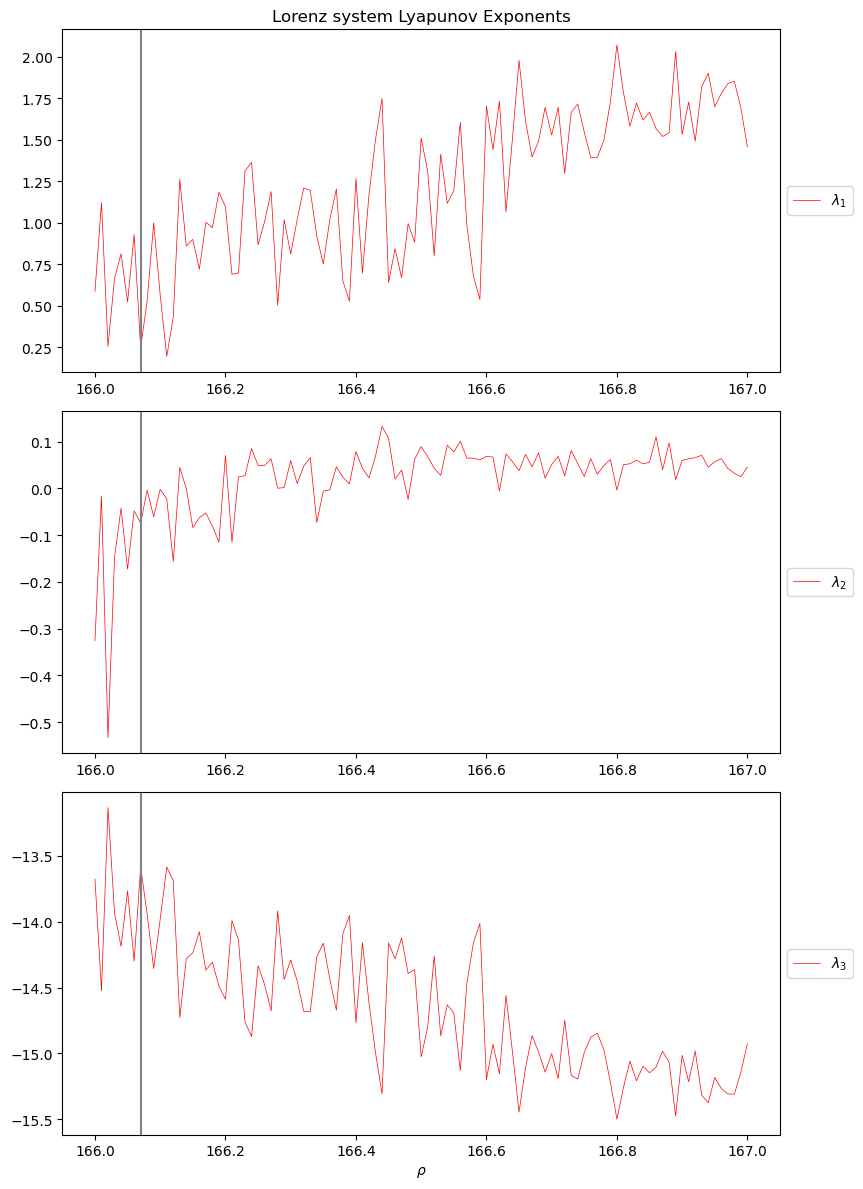

In [6]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
axs[0].set_title("Lorenz system Lyapunov Exponents")

for i in range(D):
    axs[i].plot(rho_list, True_LE[:,i] , label= axis_test_label[i], color='red' , lw = 0.5)
    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[i].axvline(x = 166.07   , color = 'grey')
    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.show()

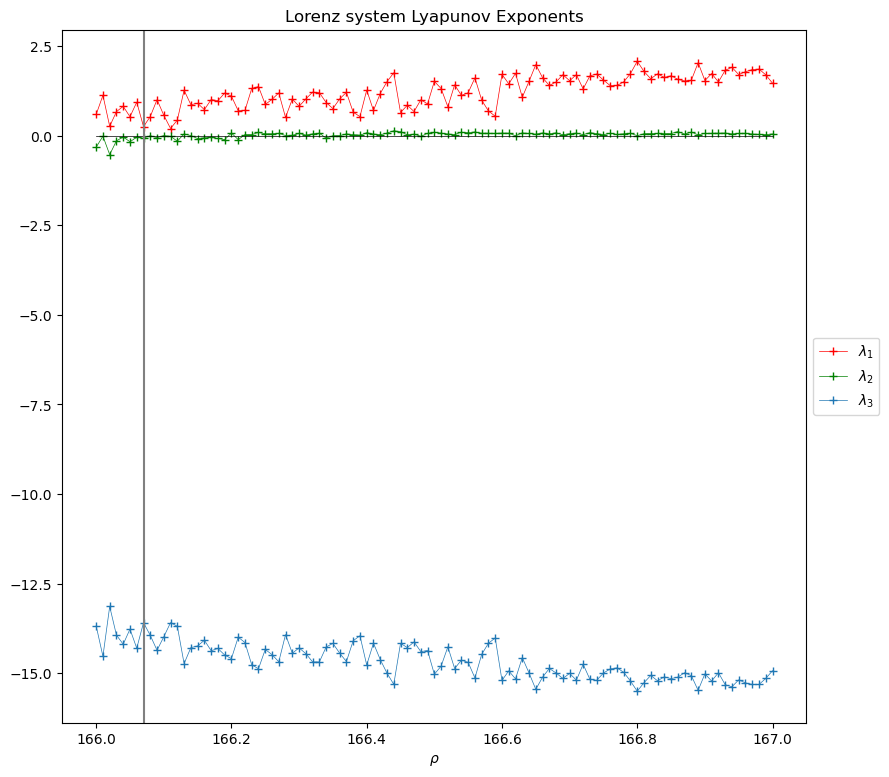

In [7]:
# Plot Lorenz system Lyapunov Exponents
fig = plt.figure(figsize = (12, 9)) 
ax  = fig.add_subplot(1, 1, 1)

axis_test_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
ax.set_title("Lorenz system Lyapunov Exponents")

ax.plot(rho_list, True_LE[:,0] , label= axis_test_label[0], color='red'  , marker='+',lw = 0.5)
ax.plot(rho_list, True_LE[:,1] , label= axis_test_label[1], color='green', marker='+',lw = 0.5)
ax.plot(rho_list, True_LE[:,2] , label= axis_test_label[2], color='C0'   , marker='+',lw = 0.5)
ax.plot(rho_list, 0*True_LE[:,0], color='black', lw = 0.5)
#
ax.axvline(x = 166.07   , color = 'grey')
#
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!

plt.show()

In [8]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 9.40e+02 s
